In [1]:
!pip install torchcam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 8.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 7.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy0m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/9 [Pillow]
    Found existing installation: numpy 2.2.5━━━━━━━━━━━━━━━━━━ 1/9 [Pillow]
    Uninstalling numpy-2.2.5:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/9 [Pillow]
      Successfully uninstalled numpy-2.2.5━━━━━━━━━━━━━━━━━━━━ 1/9 [Pillow]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [torchcam]7/9 [matplotlib]


In [15]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 7.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.7.0
    Uninstalling torch-2.7.0:━━━━━━━━━━━━━━━━━━━ 0/2 [torch]
      Successfully uninstalled torch-2.7.0━━━━━━ 0/2 [torch]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [torchvision] [torchvision]


In [17]:
from torchcam.methods import GradCAM
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

In [29]:
import torch

In [3]:
from baseline_cnn import CNNSpoofDetector, get_data, pad_and_tensorize

In [5]:
X_train, y_train = get_data(X_path ='../data/dataset/mfcc_train_60_cnn/X_train_60_cnn.pkl', y_path = '../data/dataset/mfcc_train_60_cnn/y_train_60_cnn.pkl')
X_dev, y_dev = get_data(X_path ='../data/dataset/mfcc_dev_60_cnn/X_dev_60_cnn.pkl', y_path = '../data/dataset/mfcc_dev_60_cnn/y_dev_60_cnn.pkl')

In [7]:
max_len = max(max([x.shape[1] for x in X_train]), max([x.shape[1] for x in X_dev]))

In [9]:
X_train_final, y_train_final = pad_and_tensorize(X_train, y_train, max_len)
X_dev_final, y_dev_final = pad_and_tensorize(X_dev, y_dev, max_len)

In [103]:
# 21，89
x_sample = X_train_final[21]
x = x_sample.unsqueeze(0)
print(x_sample.shape)
print(x.shape)
print(y_train_final[89])
print(y_train_final[:100])

torch.Size([1, 60, 413])
torch.Size([1, 1, 60, 413])
tensor(0)
tensor(1)
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])


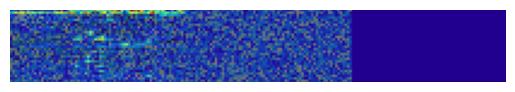

In [105]:
# Create the model instance and load the trained weights
model = CNNSpoofDetector()
model.load_state_dict(torch.load("best_model_0176.pth", map_location=torch.device('cpu')))
model.eval()  # Set the model to evaluation mode

# Initialize GradCAM. The target_layer should be the name of the layer we want to visualize
cam_extractor = GradCAM(model, target_layer='conv2')

# Assume x is a preprocessed input tensor with shape [1, 1, H, W]
out = model(x)  # Forward pass to get the model output

# Extract the activation map (e.g., for class 0 if it's a binary classification)
activation_map = cam_extractor(class_idx, out)

# Visualize the result
plt.imshow(to_pil_image(x.squeeze(0)))  # Show the original image
plt.imshow(activation_map[0].squeeze().numpy(), alpha=0.5, cmap='jet')  # Overlay the CAM heatmap
plt.axis('off')
plt.show()


In [107]:
print(out)
print(out.argmax(dim=1).item())

tensor([[22.5193]], grad_fn=<AddmmBackward0>)
0
